In [2]:
import numpy as np
import matplotlib.pyplot as plt

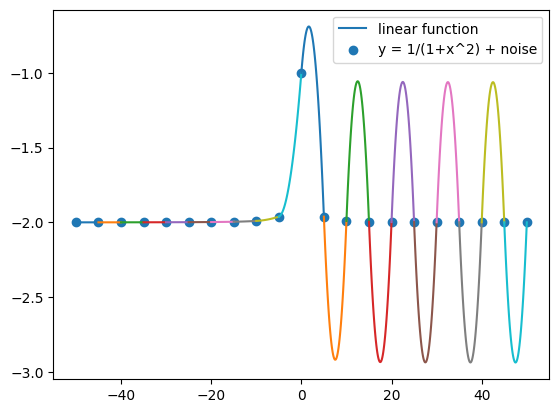

In [4]:
x = np.linspace(-50,50, 20)
y = 1 / (1+ x**2) + 0.5*np.random.randint(-10,10)
n = len(x) - 1
x_matrix = np.zeros((3*n, 3*n))
y_matrix = np.zeros((3*n - 1, 1)) 

# fill 2n rows:

for i in range(0, 2*n -1, 2):
    row1 = []
    row2 = []
    for j in range(i - int(i/2)):
        row1.append(0)
        row1.append(0)
        row1.append(0)
        row2.append(0)
        row2.append(0)
        row2.append(0)
    row1.append(x[i-int(i/2)]**2)
    row1.append(x[i - int(i/2)])
    row1.append(1)
    row2.append(x[i-int(i/2) + 1 ]**2)
    row2.append(x[i-int(i/2) + 1])
    row2.append(1)
    if len(row1) < 3*n:
        for o in range(3*n - len(row1)):
            row1.append(0)
            row2.append(0)
    x_matrix[i] = row1
    x_matrix[i+1] = row2

# fill n -1 rows:
for i in range(1, n):
    row = []
    for j in range(1, i):
        row.append(0)
        row.append(0)
        row.append(0)
    row.append(2*x[i])
    row.append(1)
    row.append(0)
    row.append(- 2* x[i])
    row.append(-1)
    if len(row) < 3*n:
        for o in range(3*n - len(row)):
            row.append(0)
    x_matrix[2*n - 1 + i] = row
# last row of zeros

# fill y matrix:
y_matrix[0] = y[0]
y_matrix[2*n - 1] = y[len(y) -1]

for i in range(1, 2*n -1, 2):
    y_matrix[i] = y[i + 1 - int((i+1)/2)]
    y_matrix[i+1] = y[i + 1 - int((i+1)/2)]


x_matrix = np.delete(x_matrix, obj = 0, axis = 1)
x_matrix = np.delete(x_matrix, obj = 3*n - 1, axis = 0)

unknown_matrix = np.linalg.solve(x_matrix, y_matrix)

# a1 = 0
i = np.linspace(x[0], x[1])
j = unknown_matrix[0]*i + unknown_matrix[1]
plt.plot(i,j, label = "linear function")

for i in range(1, n):
       o = np.linspace(x[i], x[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       plt.plot(o,l)

plt.scatter(x,y, label = "y = 1/(1+x^2) + noise")
plt.legend()
plt.show()